In [1]:
import numpy as np
from tqdm import tqdm
from Blackjack import blackjack


import matplotlib.pyplot as plt



%matplotlib inline


# Часть первая, с блекджеком и стратегиями


In [2]:
env = blackjack.BlackjackEnv(natural=True)

In [3]:
def simple_strategy(env):
    history = []
    points, dealer, _ = env.reset()
    R = 0
    history.append((points, dealer, R))
    end = False
    while not end:
        if history[-1][0] in [19, 20, 21]:
            action = 0
        else:
            action = 1
        tmp, R, end, _ = env.step(action)
        history.append((tmp[0], tmp[1],  R))
        
    return history

In [4]:
#Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.
# Не на 100% уверен, что вы под этим имели в виду Поэтому посчитал ожидаемый выйгрышь для каждой позиции
# И просто средний выйгрышь
def get_Monte_Carlo_V(strategy, env, j=1, n_iter=100000):
    V = np.zeros((21, 21))
    N = np.zeros((21, 21))
    for i in range(n_iter):
        G = 0
        history = simple_strategy(env)
        T = len(history)-1
        for t in range(T-1, -1, -1):
            G = G*j + history[t+1][2]
            player, dealer = history[t][0]-1, history[t][1]-1
            N[player, dealer] += 1
            V[player, dealer] += 1/N[player, dealer]*(G-V[player, dealer])
    return V
            

In [5]:
get_Monte_Carlo_V(simple_strategy, env)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.31372549, -0.2826087 , -0.41666667, -0.175     

In [6]:
def get_Monte_Carlo_R(strategy, env, j=1, n_iter=100000):
    R = 0
    for i in range(n_iter):
        G = 0
        R += simple_strategy(env)[-1][2]
    return R/n_iter

In [7]:
get_Monte_Carlo_R(simple_strategy, env)

-0.18499

### Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym

In [8]:
def Q_learning_episode(env, pi, Q, alpha=0.1, epsilon=0.1, gamma=0.9):
    player, dealer, _ = env.reset()
    player -= 1
    dealer -= 1
    end = False
    action = pi[player, dealer] if np.random.rand() > epsilon else np.random.randint(Na)
    while not end:
        tmp, reward, end, _ = env.step(action)
        action_prime = pi[tmp[0]-1, tmp[1]-1] if np.random.rand() > epsilon else np.random.randint(Na)
        Q[player, dealer][action] = Q[player, dealer][action] + alpha * (reward + gamma * np.max( Q[tmp[0]-1, tmp[1]-1] ) - Q[player, dealer][action])
        player, dealer, action = tmp[0]-1, tmp[1]-1, action_prime
    return Q, pi, reward

### Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры.


  1%|▊                                                                        | 1052/100000 [00:00<00:09, 10417.56it/s]

Еpsilon 1 -0.38622


  1%|▊                                                                        | 1054/100000 [00:00<00:09, 10538.75it/s]

Еpsilon 0.5 -0.27754


  1%|▊                                                                        | 1033/100000 [00:00<00:09, 10328.04it/s]

Еpsilon 0.2 -0.191005


  1%|▊                                                                        | 1033/100000 [00:00<00:09, 10328.56it/s]

Еpsilon 0.1 -0.17741


100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10144.92it/s]

Еpsilon 0 -0.15989


Text(0, 0.5, 'Средний доход')

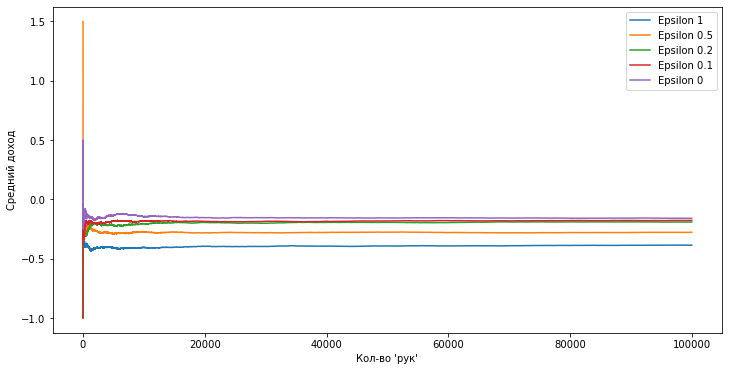

In [9]:
Q = np.random.rand(31,31,2)
Na = 2
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
n_heands = 100000
for epsilon in [1, 0.5, 0.2, 0.1, 0]:
    avg = []
    sm = 0
    for i in tqdm(range(n_heands)):
        pi = np.argmax(Q, axis=2 )
        Q, pi, reward = Q_learning_episode(env, pi, Q, alpha=0.05, epsilon=epsilon, gamma=0.9)
        sm += reward
        avg.append(sm/(i+1))
    print(f"Еpsilon {epsilon}", avg[-1])
        
    ax.plot(list(range(n_heands)), avg, label=f"Еpsilon {epsilon}")
ax.legend(loc="upper right")
#ax.set_xlim((1, total_episodes))
ax.set_xlabel("Кол-во 'рук'")
ax.set_ylabel("Средний доход")

# Часть вторая, удвоенная

In [10]:
env = blackjack.BlackjackEnv(double=True, natural=True)

In [11]:
env.reset()

(9, 10, False)

In [12]:
env.step(2)

((15, 10, False), 2.0, True, {})

  1%|▊                                                                        | 1029/100000 [00:00<00:09, 10188.35it/s]

Еpsilon 1 -0.463935


  1%|▋                                                                        | 1023/100000 [00:00<00:09, 10228.23it/s]

Еpsilon 0.5 -0.315795


  1%|▋                                                                        | 1016/100000 [00:00<00:09, 10157.49it/s]

Еpsilon 0.2 -0.217555


  1%|▋                                                                        | 1002/100000 [00:00<00:09, 10018.46it/s]

Еpsilon 0.1 -0.184745


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9783.35it/s]

Еpsilon 0 -0.152875


Text(0, 0.5, 'Средний доход')

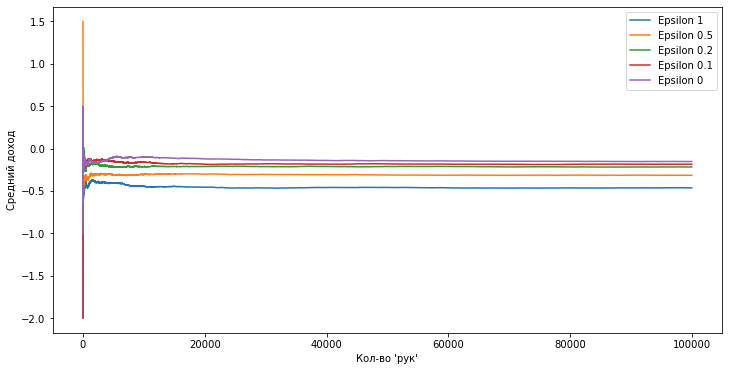

In [13]:
Q = np.random.rand(31,31,3)
Na = 3
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
n_heands = 100000
for epsilon in [1, 0.5, 0.2, 0.1, 0]:
    avg = []
    sm = 0
    for i in tqdm(range(n_heands)):
        pi = np.argmax(Q, axis=2 )
        Q, pi, reward = Q_learning_episode(env, pi, Q, alpha=0.05, epsilon=epsilon, gamma=0.9)
        sm += reward
        avg.append(sm/(i+1))
    print(f"Еpsilon {epsilon}", avg[-1])
        
    ax.plot(list(range(n_heands)), avg, label=f"Еpsilon {epsilon}")
ax.legend(loc="upper right")
#ax.set_xlim((1, total_episodes))
ax.set_xlabel("Кол-во 'рук'")
ax.set_ylabel("Средний доход")

# Часть третья, в главной роли — Дастин Хоффма

Просто сохраняю все карты по кооимбинациям из 2, 3, 4... .Приходится сохранять все в dict чтобы влезло в память, поэтому считается очень долго... :(

In [14]:
env = blackjack.MyBlackjackEnv(natural=True)

In [15]:
env.reset()

((16, 6, False), 0, False, False)

In [16]:
env.step(1)

((20, 6, False), 0.0, False, False)

In [17]:
def find(x):
    count = 0
    for i in range(len(x)):
        if x[i] == ',':
            count += 1
            if count == 2:
                return i

In [18]:
def Q_learning_episode(env, pi, Q, alpha=0.1, epsilon=0.1, gamma=0.9):
    tmp, _, end, reseted = env.reset()
    player, dealer = tmp[0], tmp[1]
    player -= 1
    dealer -= 1
    rewards = []
    key_pi = f"{player},{dealer},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0}"
    action = pi[key_pi]  if np.random.rand() > epsilon and pi.get(key_pi) is not None else np.random.randint(Na)
    key_Q = key_pi
    while not reseted:
        tmp, reward, end, reseted = env.step(action)
        index = env.cards_to_index()
        key_pi_prime = f"{tmp[0]-1},{tmp[1]-1}"
        
        if pi.get(key_pi) is None:
            pi[key_pi] = np.random.randint(Na)
        for i in index:
            key_pi_prime += f",{i}"
        if pi.get(key_pi_prime) is None:
            pi[key_pi_prime] = np.random.randint(Na)
        action_prime = pi[key_pi_prime]  if np.random.rand() > epsilon and pi.get(key_pi) is not None else np.random.randint(Na)
        key_Q_prime = key_pi_prime
        if Q.get(key_Q) is None:
            Q[key_Q] = np.random.random(size=Na)
        if Q.get(key_Q_prime) is None:
            Q[key_Q_prime] = np.random.random(size=Na)
        Q[key_Q][action_prime] = Q[key_Q][action_prime] + alpha * (reward + gamma * np.max( Q[key_Q_prime] ) - Q[key_Q][action_prime])
        key_pi, key_Q = key_pi_prime, key_Q_prime
        if end:
            rewards.append(reward)
            pi = {key: Q[key].argmax() for key in Q}
            tmp, _, end, reseted = env.reset()
            key_pi = f"{tmp[0]-1},{tmp[1]-1}"+key_pi[find(key_pi):]
            action = pi[key_pi]  if np.random.rand() > epsilon and pi.get(key_pi) is not None else np.random.randint(Na)
            key_Q = key_pi
            
    return Q, pi, np.mean(rewards)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
n_heands = 1000
Na = 3
for epsilon in [0.5, 0.2, 0.1, 0]:
    avg = []
    Q = dict()
    pi = dict()
    sm = 0
    for i in tqdm(range(n_heands)):
        Q, pi, reward = Q_learning_episode(env, pi, Q, alpha=0.05, epsilon=epsilon, gamma=0.9)
        sm += reward
        avg.append(sm/(i+1))
    print(f"Еpsilon {epsilon}", avg[-1])
        
    ax.plot(list(range(n_heands)), avg, label=f"Еpsilon {epsilon}")
ax.legend(loc="upper right")
ax.set_xlabel("Кол-во 'рук'")
ax.set_ylabel("Средний доход")

  2%|█▊                                                                             | 23/1000 [00:00<00:04, 223.28it/s]

Еpsilon 0.5 -0.5576533075627279


  2%|█▉                                                                             | 24/1000 [00:00<00:04, 233.05it/s]

Еpsilon 0.2 -0.5641366809448278


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [01:40<00:09,  6.01it/s]